In [86]:
import ROOT
import uproot
import matplotlib.pyplot as plt
import scipy as scp
from scipy.integrate import trapezoid
import numpy as np
import awkward as ak

In [87]:
#Open root file with both shapes and measurements

FILE_PATH_ELE = "../SplittedwaveRootFile/Run_Na_waveform_maggio_1.root" #Relative file path
FILE_PATH_MARTI = "../Dati/Run_Na_waveform_maggio_1.root" #Relative file path
file = uproot.open(FILE_PATH_MARTI)
file["tree"].show() #Display contents

name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
ev                   | int32_t                  | AsDtype('>i4')
nch                  | int32_t                  | AsDtype('>i4')
ch                   | int32_t[]                | AsJagged(AsDtype('>i4'))
base                 | float[]                  | AsJagged(AsDtype('>f4'))
amp                  | float[]                  | AsJagged(AsDtype('>f4'))
charge               | float[]                  | AsJagged(AsDtype('>f4'))
letime               | float[]                  | AsJagged(AsDtype('>f4'))
tetime               | float[]                  | AsJagged(AsDtype('>f4'))
ratecount            | float[]                  | AsJagged(AsDtype('>f4'))
pshape               | float[][1024]            | AsJagged(AsDtype("('>f4', (...


In [88]:
print(type(file["tree"]["base"].array()))
bl=file["tree"]["base"].array()
print(ak.num(bl))
bl = bl[2:-1]
print(np.unique(ak.num(bl)))
#l'ultimo array aveva una forma diversa, quindi l'ho tagliato altrimenti faceva casini

<class 'awkward.highlevel.Array'>
[16, 16, 16, 16, 16, 16, 16, 16, 16, ..., 16, 16, 16, 16, 16, 16, 16, 16, 10]
[16]


In [89]:
nch=file["tree"]["ch"].array()[1:-1]

In [90]:
#Load data to numpy arrays

baselines = np.array(file["tree"]["base"].array()[1:-1]) #il [:-1] toglie l'ultimo evento che si è splittato male
charges = np.array(file["tree"]["charge"].array()[1:-1])
amp = np.array(file["tree"]["amp"].array()[1:-1])
lead_edge = np.array(file["tree"]["letime"].array()[1:-1])
t_edge = np.array(file["tree"]["tetime"].array()[1:-1])
channel = np.array(file["tree"]["ch"].array()[1:-1])
waveform = np.array(file["tree"]["pshape"].array()[1:-1])

(16971, 16, 1024)
channel: 8 baseline: 0.000496 charge -413.122 lead_edge 1121.726 trailing_edge 1123.398
channel: 2 baseline: 0.000534 charge -1767.444 lead_edge 449.049 trailing_edge 452.975
channel: 12 baseline: -0.003431 charge -13.42 lead_edge 941.557 trailing_edge 943.487


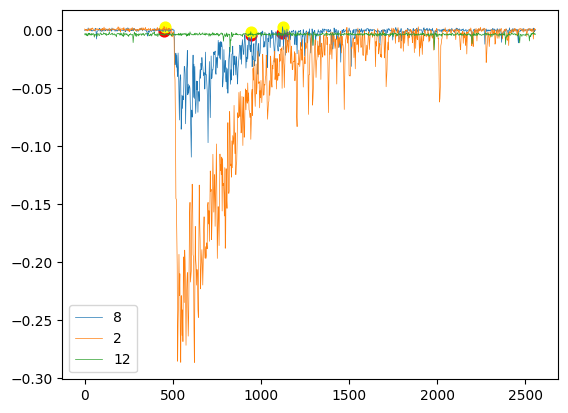

In [98]:
print(waveform.shape)
event= 700
list = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
list=[8,2,12]
sampling=2.5
for channel in list:
    time=np.arange(1024)
    plt.plot(time*sampling, waveform[event][channel], label='{}'.format(channel), linewidth=0.5)
    print("channel:", channel, "baseline:",  baselines[event][channel],"charge", charges[event][channel], "lead_edge", lead_edge[event][channel], "trailing_edge", t_edge[event][channel] )
    t1=lead_edge[event][channel]
    t2=t_edge[event][channel]
    plt.scatter( t1, waveform[event][channel][int(t1/sampling)],s=60, color='red'  )
    plt.scatter( t2, waveform[event][channel][int(t2/sampling)],s=60, color='yellow'  )

plt.legend()



(16971, 16, 1024)
channel: 3 baseline: 0.000229 charge 3.233 lead_edge 49.893 trailing_edge 55.874
channel: 13 baseline: 0.000572 charge -654.164 lead_edge 294.059 trailing_edge 296.638
channel: 5 baseline: 0.000801 charge 2.287 lead_edge 2551.458 trailing_edge 2553.612
channel: 6 baseline: -0.000267 charge -1492.365 lead_edge 1589.586 trailing_edge 1590.981


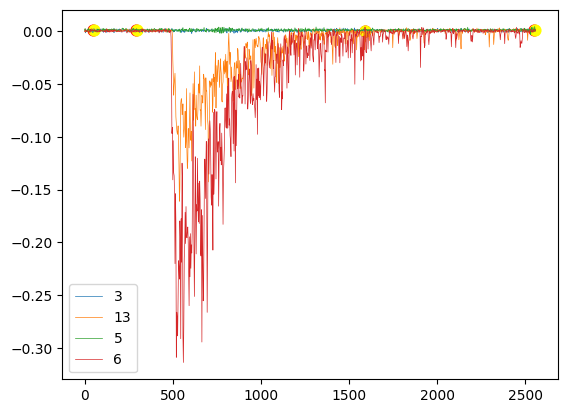

In [95]:
print(waveform.shape)
event= 10000
list = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
list=[3,13,5, 6]
sampling=2.5
for channel in list:
    time=np.arange(1024)
    plt.plot(time*sampling, waveform[event][channel], label='{}'.format(channel), linewidth=0.5)
    print("channel:", channel, "baseline:",  baselines[event][channel],"charge", charges[event][channel], "lead_edge", lead_edge[event][channel], "trailing_edge", t_edge[event][channel] )
    t1=lead_edge[event][channel]
    t2=t_edge[event][channel]
    plt.scatter( t1, waveform[event][channel][t],s=60, color='red'  )
    plt.scatter( t2, waveform[event][channel][t],s=60, color='yellow'  )

plt.legend()

(16971, 16, 1024)
channel: 5 baseline: 0.000762 charge -873.52 lead_edge 1821.979 trailing_edge 1826.536
channel: 13 baseline: 0.000762 charge -356.972 lead_edge 2213.833 trailing_edge 2216.238


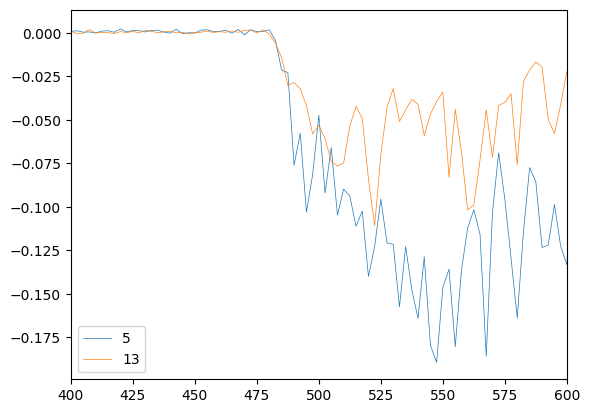

In [99]:
print(waveform.shape)
event= 980
list = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
list=[5,13]
sampling=2.5
for channel in list:
    time=np.arange(1024)
    plt.plot(time*sampling, waveform[event][channel], label='{}'.format(channel), linewidth=0.5)
    print("channel:", channel, "baseline:",  baselines[event][channel],"charge", charges[event][channel], "lead_edge", lead_edge[event][channel], "trailing_edge", t_edge[event][channel] )
    t1=lead_edge[event][channel]
    t2=t_edge[event][channel]
    plt.scatter( t1, waveform[event][channel][t],s=60, color='red'  )
    plt.scatter( t2, waveform[event][channel][t],s=60, color='b'  )

    plt.xlim(400, 600)

plt.legend()


channel: 4 baseline: 0.000572 charge -728.554 lead_edge 121.803 trailing_edge 123.486
channel: 1 baseline: 0.000724 charge -720.807 lead_edge 2458.952 trailing_edge 2460.721


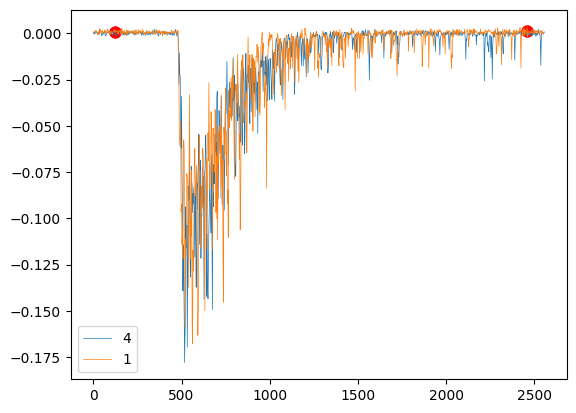

In [85]:
event= 960
list = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
list=[4,1]
sampling=2.5
for channel in list:
    time=np.arange(1024)
    plt.plot(time*sampling, waveform[event][channel], label='{}'.format(channel), linewidth=0.5)
    print("channel:", channel, "baseline:",  baselines[event][channel],"charge", charges[event][channel], "lead_edge", lead_edge[event][channel], "trailing_edge", t_edge[event][channel] )
    t1=lead_edge[event][channel]
    t2=t_edge[event][channel]
    plt.scatter( t1, waveform[event][channel][t],s=60, color='red'  )
    plt.scatter( t2, waveform[event][channel][t],s=60, color='red'  )

  
  

plt.legend()

In [ ]:
event= 960
list = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
list=[4,1]
sampling=2.5
for channel in list:
    time=np.arange(1024)
    plt.plot(time*sampling, waveform[event][channel], label='{}'.format(channel), linewidth=0.5)
    print("channel:", channel, "baseline:",  baselines[event][channel],"charge", charges[event][channel], "lead_edge", lead_edge[event][channel], "trailing_edge", t_edge[event][channel] )
    t1=lead_edge[event][channel]
    t2=t_edge[event][channel]
    plt.scatter( t1, waveform[event][channel][t],s=60, color='red'  )
    plt.scatter( t2, waveform[event][channel][t],s=60, color='red'  )

  
  

plt.legend()